<p style="font-size:36px;text-align:center"> <b>Stockout Prediction</b> </p>

<h2>1. Importing the required libraries <h>

In [76]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab 
import scipy.stats as stats
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from imblearn.combine import SMOTETomek
from sklearn.linear_model import SGDClassifier
import gdown
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from joblib import dump, load

In [ ]:
!unrar x /content/rebuilt.dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/rebuilt.dataset.rar

Extracting  Kaggle_Training_Dataset_v2.csv                                 0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87%  OK 
Extracting  Kaggle_Test_Dataset_v2.csv                                    87% 88% 89%

<h2> 2. Loading dataset <h2>

In [ ]:
data = pd.read_csv('Kaggle_Training_Dataset_v2.csv') 
df = data.copy()

<h3> 2.1 Checking the data stats <h3>

In [ ]:
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
#print("Number of categorical featues including Product id and target variable : " , data.select_dtypes(exclude=['int', 'float']).shape[1])
print('Features : ', data.columns.values)

Number of data points :  1687861
Number of features :  23
Features :  ['sku' 'national_inv' 'lead_time' 'in_transit_qty' 'forecast_3_month'
 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month'
 'sales_6_month' 'sales_9_month' 'min_bank' 'potential_issue'
 'pieces_past_due' 'perf_6_month_avg' 'perf_12_month_avg' 'local_bo_qty'
 'deck_risk' 'oe_constraint' 'ppap_risk' 'stop_auto_buy' 'rev_stop'
 'went_on_backorder']


In [ ]:
data.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
data.tail(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




*   There are in total 1687861 datapoints and 23 features in the dataset
*   Out of the 23 features 22 are indpendent features and 1 is dependent feature ( Target variable)
*   The target variable column name is "went_on_backorder"
*   The last row of the dataset consists of NaN values for all features



<h3> 2.2 Info of dataset of data types and non-null values <h3>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n



*   Dataset has 15 columns of data type float and 8 coumns are string ( including target variable)
*   Only the column lead_time has a few null values.
*   It seems the firt column sku consists of productids , if all of them are unique then this column can be dropped.






<h3> 2.3 Checking different statastics of the numerical columns using pandas describe fnction <h3>

In [ ]:
data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


*   The scale of all the features is not same and should be scaled for better performance of ML models.
*   For  all numerical columns the mean value(except for lead_time) is between 50th and 75th percentile or mostly it is above 75th percentile (except for performance columns) which depict that data is extremely skewed right side.
*   The lead_time feature is left skewed.
*   The difference between 75th percentile and max values is very high which depcits that data contains many outliers.
*   The columns perf_6_month_avg and perf_12_month_avg has max. value as 1 and min. value as -99. It seems the missing values are replaced with -99.


<h3> 2.4 Checking the number of unique rows in sku column <h3>

In [ ]:
data.sku.unique()

array([1026827, 1043384, 1043696, ..., '1439563', '1502009',
       '(1687860 rows)'], dtype=object)



*   As expected the number of unique values in sku column is equal to the number of rows.
*   So this column can be dropped or used as index



Dropping unwanted rows and columns

In [ ]:
# Dropping last row as it contains NaN values
data.drop(data.tail(1).index,inplace=True) 


#Dropping first column
data.drop(['sku'], axis = 1,inplace=True) 

<h3> 2.5 Checking the class ratio of target variable <h3>

In [ ]:
data.went_on_backorder.value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64



*   The target variable went_on_backorder is a categorical feature with two values "Yes" and "No".
*   99.33% belong to the class "Yes" and remaining 0.669% belong to the class "No" .
*   Hence the dataset is highly imbalanced with majority and minority class ratio of approximately 148:1



<h3>2.6 Plotting Box plots <h3>

Box plot of national_inv

Text(0.5, 1.0, 'Box plot of national_inv')

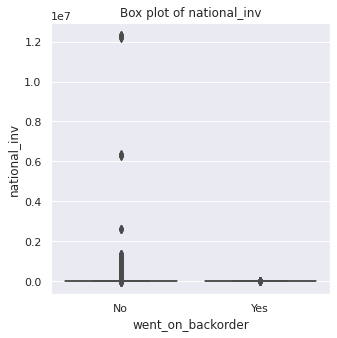

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x='went_on_backorder',y='national_inv', data=data).set_title('Box plot of national_inv')

Text(0.5, 1.0, 'Box plot of national_inv from 0.1th to 90th percentile')

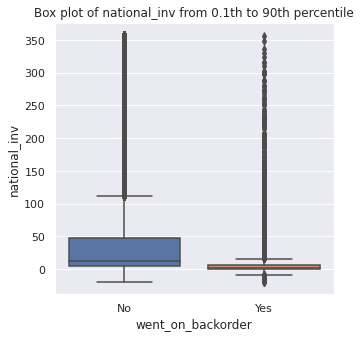

In [ ]:
sns.boxplot(x='went_on_backorder',y='national_inv', data=data[(data.national_inv < data.national_inv.quantile(0.90))  & (data.national_inv > data.national_inv.quantile(0.001)) ]).set_title('Box plot of national_inv from 0.1th to 90th percentile')

*   The spread is very high for inventory stock feature and IQR range is very small
*   Fortunately the majority class has outliers and there aren't any outliers in minority class
*   The IQR ranges for both the classes overlap so using this feature individualy won't be very useful for class separation
*   When plotted boxplot considering only the values between 0.1th and 90th percentile values of national_inv it can be seen that majority of the outliers on positive side are removed and max. value dropped from 10^7 to range of 350 
*   Also IQRs of both classes are not overlapping as they were before

Box plot of Lead time feature

Text(0.5, 1.0, 'Box plot of lead_time')

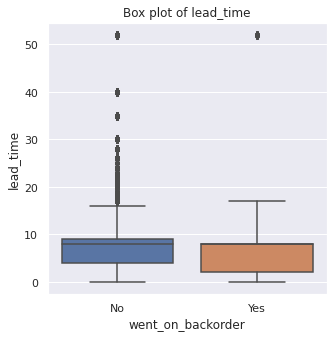

In [ ]:
sns.boxplot(x='went_on_backorder',y='lead_time', data=data).set_title('Box plot of lead_time')

*   There are a few outliers in the lead_time feature.
*   IQR of both the classes overlap to some extent , so this feature can be useful in separation of both classes at least in those cases where lead_time is less than 25th percentile value of negative class
*   Median is nearer to 75th percentile value

Box plot of in_transit_qty

Text(0.5, 1.0, 'Box plot of in_transit_qty')

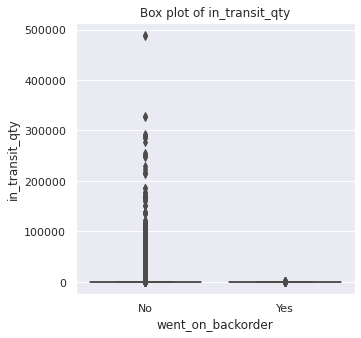

In [ ]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=data).set_title('Box plot of in_transit_qty')

Text(0.5, 1.0, 'Box plot of in_transit_qty from 0 to 90th percentile')

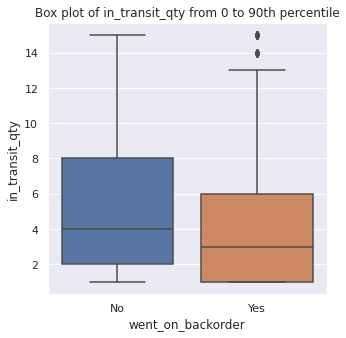

In [ ]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=data[(data.in_transit_qty < data.in_transit_qty.quantile(0.90))  & (data.in_transit_qty > data.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty from 0 to 90th percentile')

In [ ]:
data[['in_transit_qty']].describe()

,in_transit_qty
count,1.687860e+06
mean,4.405202e+01
std,1.342742e+03
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,4.894080e+05




*   Similar to inventory stock feature the IQR is very small and there are many outliers(noise) in the orders that didn't go on backorder
*   The IQR of both the classes for this feature are overlapping .
*   After removal of values which are greater than 90th quantile value and whch are les than 0th quantile it can be seen that in_transit_qty values dropped from 5*10^5 to 16
*   The IQR of both the classes for this feature are overlapping only to some extent now after removal of outliers and for many items whose transit quantity is less than 2 went to backorder and whose quantity is greater than 6 didn't go to backorder


Box plot of the 3 forecast columns

Text(0.5, 0.98, 'Box plot of forecast features')

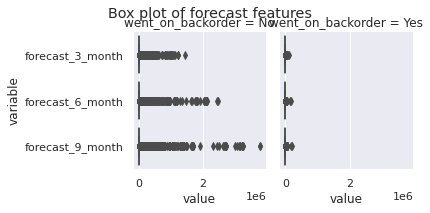

In [ ]:
#https://stackoverflow.com/questions/25284859/grouping-boxplots-in-seaborn-when-input-is-a-dataframe
g = sns.FacetGrid(pd.melt(data[['forecast_3_month','forecast_6_month','forecast_9_month','went_on_backorder']], id_vars='went_on_backorder'), col='went_on_backorder')
g.map(sns.boxplot, 'value', 'variable')
g.fig.suptitle('Box plot of forecast features')

Text(0.5, 1.0, 'Box plot of forecast_3_month from 0 to 90th percentile')

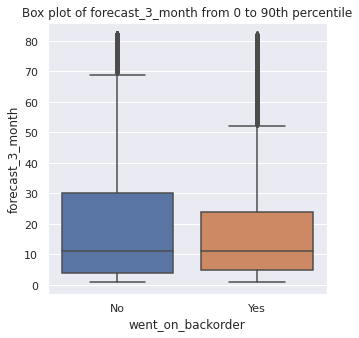

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=data[(data.forecast_3_month < data.forecast_3_month.quantile(0.90))  & (data.forecast_3_month > data.forecast_3_month.quantile(0))]).set_title('Box plot of forecast_3_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_6_month from 0 to 90th percentile')

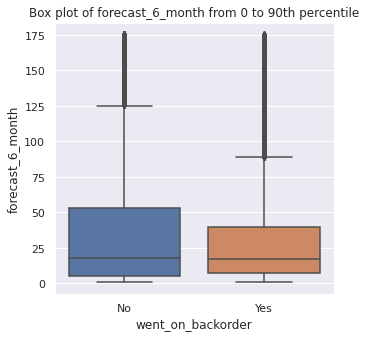

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=data[(data.forecast_6_month < data.forecast_6_month.quantile(0.90))  & (data.forecast_6_month > data.forecast_6_month.quantile(0))]).set_title('Box plot of forecast_6_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_9_month from 0 to 90th percentile')

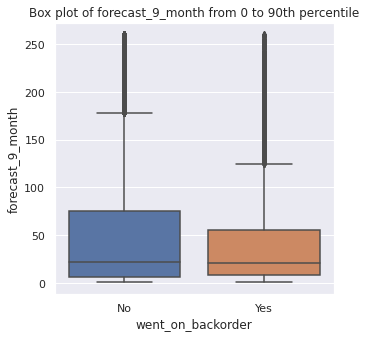

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=data[(data.forecast_9_month < data.forecast_9_month.quantile(0.90))  & (data.forecast_9_month > data.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of forecast_9_month from 0 to 80th percentile')

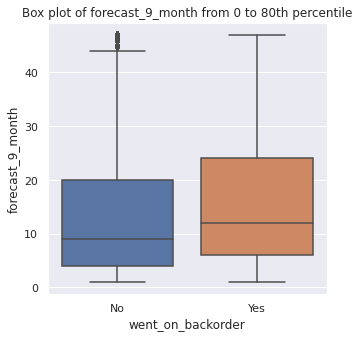

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=data[(data.forecast_9_month < data.forecast_9_month.quantile(0.80))  & (data.forecast_9_month > data.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month from 0 to 80th percentile')



*   The distribution of all the 3 forecast features is similar.
*   Outliers do exist in these 3 features and their amount increase with forecast period
*   Even after the removal of the values which are above 90th quantile value and less than 0th quantile IQRs overlap
*   As values existed after whiskers in the plot of 0-90th percentile values boxplot if we consider only 0-80th perentile then it can be noted that if forecast is higher then there is higher chance of going to backorder



Box plot of the 3 sales columns

Text(0.5, 0.98, 'Box plot of sales features')

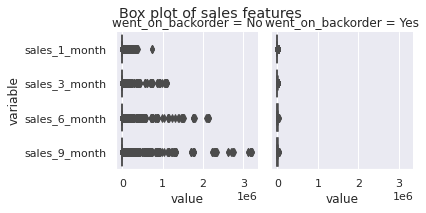

In [ ]:

g = sns.FacetGrid(pd.melt(data[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','went_on_backorder']], id_vars='went_on_backorder'), col='went_on_backorder')
g.map(sns.boxplot, 'value', 'variable')
g.fig.suptitle('Box plot of sales features')


Text(0.5, 1.0, 'Box plot of sales_1_month from 0 to 90th percentile')

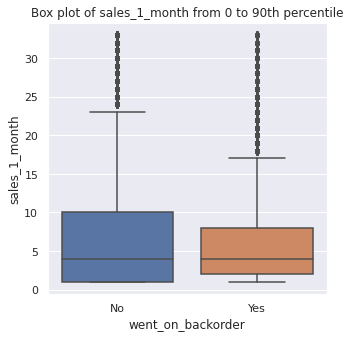

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=data[(data.sales_1_month < data.sales_1_month.quantile(0.9))  & (data.sales_1_month > data.sales_1_month.quantile(0))]).set_title('Box plot of sales_1_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_9_month from 0 to 90th percentile')

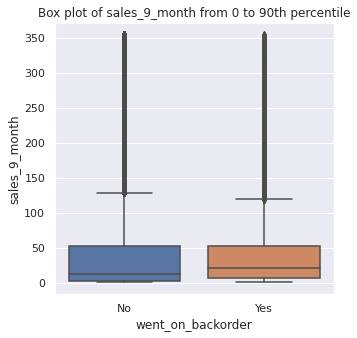

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=data[(data.sales_9_month < data.sales_9_month.quantile(0.9))  & (data.sales_9_month > data.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of sales_9_month from 0 to 80th percentile')

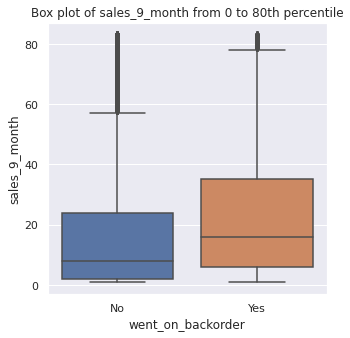

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=data[(data.sales_9_month < data.sales_9_month.quantile(0.8))  & (data.sales_9_month > data.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month from 0 to 80th percentile')

*   Box plot of sales features is similar to forecast features
*   The values of these columns are right skewed
*   Even after removal of values greater than 90th quantile value the IQRs overlap fully with many values after whisker representing the max value.
*   So similar to forecast feature if we consider only values till 80th quantile it implies that higher the sales higher are the chances of going to backorder(while making this assumption class imbalace can't be ignored)


Box plot of min_bank

Text(0.5, 1.0, 'Box plot of min_bank')

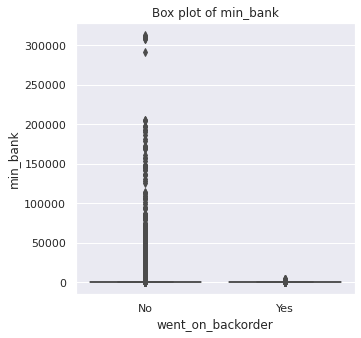

In [ ]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data).set_title('Box plot of min_bank')

Text(0.5, 1.0, 'Box plot of min_bank from 0 to 90th percentile')

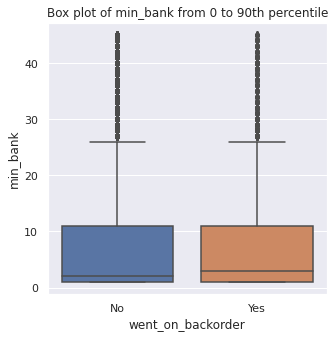

In [ ]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data[(data.min_bank < data.min_bank.quantile(0.9))  & (data.min_bank > data.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of min_bank from 0 to 80th percentile')

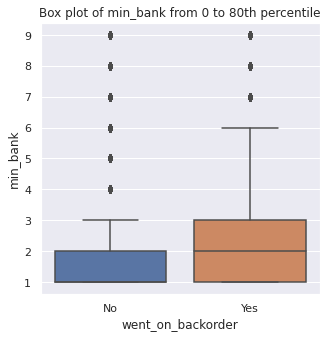

In [ ]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data[(data.min_bank < data.min_bank.quantile(0.8))  & (data.min_bank > data.min_bank.quantile(0))]).set_title('Box plot of min_bank from 0 to 80th percentile')



*   min_bank feature also has right skewedness that is data is present wit high spread after 75th percentile value.
*   The positive class ( went_on_backorder = "Yes" ) doesn't show any skewness after 75th percentile because as this feature represents minimum amount of stock recommended if it is high there is a high chance that this product didn't go on backorder 
*   If we consider only values lesser than 80th quanitle value then if min_bank > 2 then there is very high chance of item going into backorder



Box plot of performance features

Text(0.5, 0.98, 'Box plot of performance features')

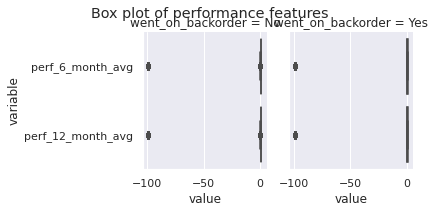

In [ ]:

g = sns.FacetGrid(pd.melt(data[['perf_6_month_avg','perf_12_month_avg','went_on_backorder']], id_vars='went_on_backorder'), col='went_on_backorder')
g.map(sns.boxplot, 'value', 'variable')
g.fig.suptitle('Box plot of performance features')


Text(0.5, 1.0, 'Box plot of perf_6_month_avg from 0 to 90th percentile')

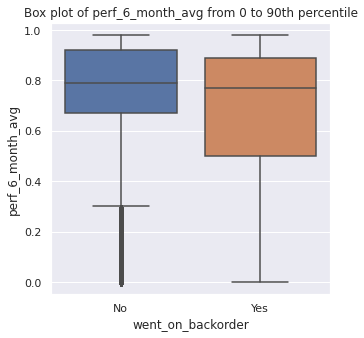

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=data[(data.perf_6_month_avg < data.perf_6_month_avg.quantile(0.9))  & (data.perf_6_month_avg > data.perf_6_month_avg.quantile(0))]).set_title('Box plot of perf_6_month_avg from 0 to 90th percentile')

Text(0.5, 1.0, 'Box plot of perf_12_month_avg from 0 to 90th percentile')

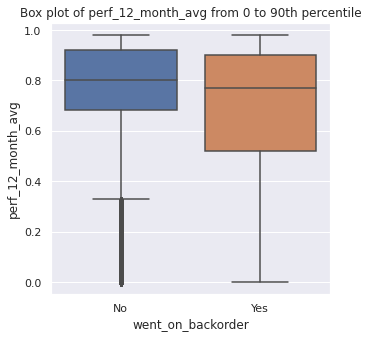

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=data[(data.perf_12_month_avg < data.perf_12_month_avg.quantile(0.9))  & (data.perf_12_month_avg > data.perf_12_month_avg.quantile(0))]).set_title('Box plot of perf_12_month_avg from 0 to 90th percentile')



*   The assumption we assumed that -99 represents a mising value for performance column seems to be true as there are n't any sgnificant negative values in the plot
*   When replotted boxplot for values between 0th and 90th quantiles it can be noted that items which underperformed in the past 6 and 12 months went to back order.




Box plot of local_bo_qty

Text(0.5, 1.0, 'Box plot of local_bo_qty')

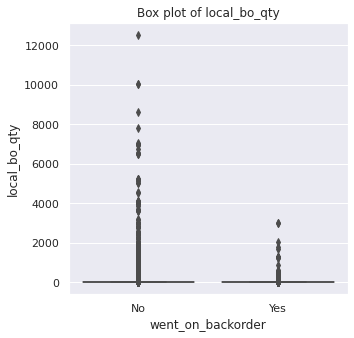

In [ ]:
sns.boxplot(x='went_on_backorder',y='local_bo_qty', data=data).set_title('Box plot of local_bo_qty')

In [ ]:
data[['local_bo_qty']].describe()

,local_bo_qty
count,1.687860e+06
mean,6.264507e-01
std,3.372224e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.253000e+04


In [ ]:
data.local_bo_qty.quantile(0.98)

0.0

In [ ]:
data.local_bo_qty.quantile(0.99)

1.0



*   Similar to other features this feature also has right skewedness  , but unlie other features the minority class ( went on back order = "Yes") also has a few values after IQR
*   Around 1% of datapoints only have non-zero value for this feature.


**Conclusions of boxplots :**

*   For Bi variate analysis the features local_bo_qty and pieces_past_due can be ignored as 98% values are zero
*   For the remaining features if we consider the datapoints between 0(0.001) th quantile and 90th quantiles values most of the outliers are removed and can make some inferences.
*   As plots of sales, forecast and performance features are same (very similar ) to the other columns in same features for bi variate analysis we can select one from each of the groups.
*   Right  skewed columns are skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

<h3>3.2.7 Plotting Barplots for Categorical features  <h3>

Barplot for rev_stop

went_on_backorder        No       Yes
rev_stop                             
No                 0.993306  0.006694
Yes                1.000000       NaN


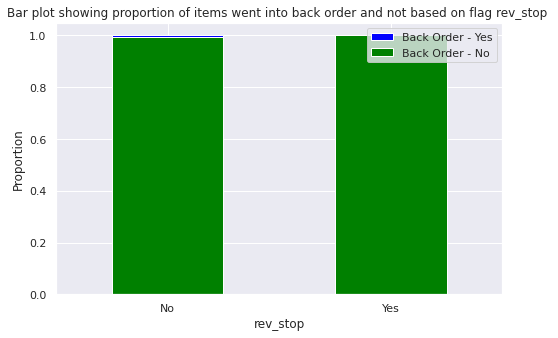

In [ ]:

counts_df = df.groupby(["rev_stop", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("rev_stop")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on flag rev_stop ")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)



*   No item went to backorder if rev_stop flag is set to Yes
*   For rev_stop = 'No' the proportion of orders that did go to back order and that weren't is same as class ratio that is 99.33 % : 0.667%



Barplot for potential_issue

went_on_backorder        No       Yes
potential_issue                      
No                 0.993336  0.006664
Yes                0.943771  0.056229


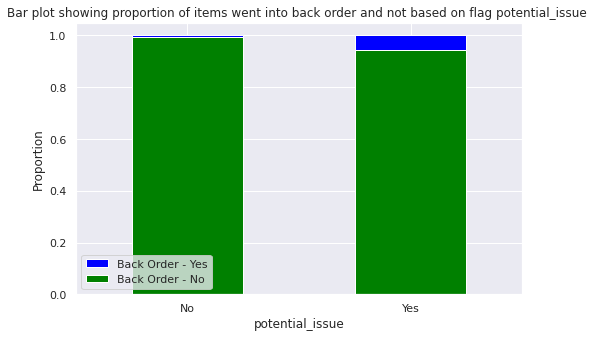

In [ ]:

counts_df = df.groupby(["potential_issue", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("potential_issue")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on flag potential_issue ")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)



*   If potential_issue flag is 'Yes' then there is 9 times more chance of item going to back order when compared to if flag set to 'No'




Barplot for deck_risk

went_on_backorder        No       Yes
deck_risk                            
No                 0.992789  0.007211
Yes                0.995055  0.004945


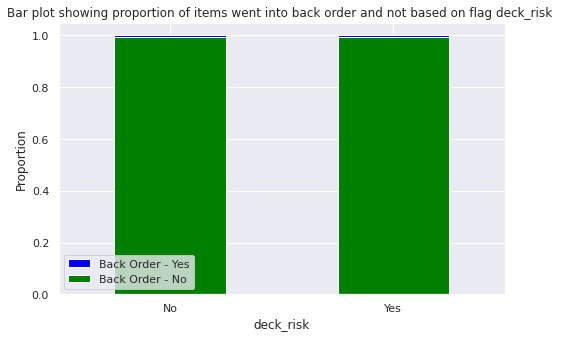

In [ ]:

counts_df = df.groupby(["deck_risk", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("deck_risk")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on flag deck_risk ")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)



*   The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk



Barplot for oe_constraint

went_on_backorder        No       Yes
oe_constraint                        
No                 0.993313  0.006687
Yes                0.967347  0.032653


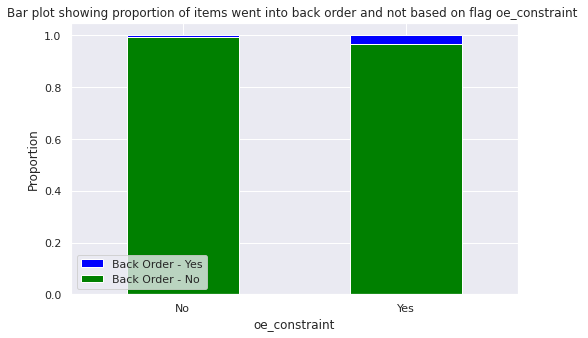

In [ ]:

counts_df = df.groupby(["oe_constraint", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("oe_constraint")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on flag oe_constraint ")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)



*   If oe_cosntraint flag is set to Yes then there is 5 times higher chance of item going to backorder when compared to flag set to No



Barplot for ppap_risk

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993576  0.006424
Yes                0.991370  0.008630


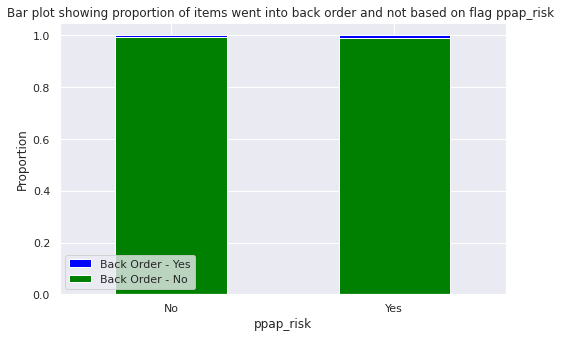

In [ ]:

counts_df = df.groupby(["ppap_risk", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("ppap_risk")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on flag ppap_risk ")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

*   The flag dec_risk is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

Barplot for stop_auto_buy

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.992290  0.007710
Yes                0.993348  0.006652


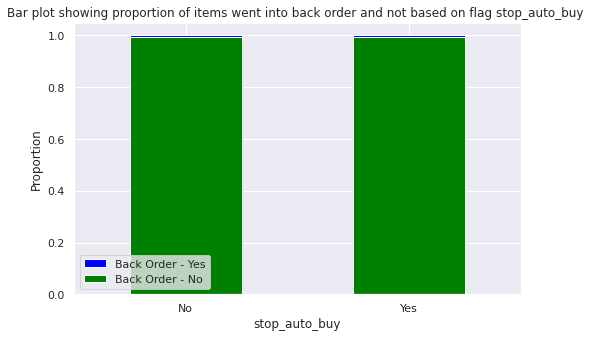

In [ ]:

counts_df = df.groupby(["stop_auto_buy", "went_on_backorder"])["sku"].count().unstack()

proportions_df = counts_df.T.div(counts_df.T.sum()).T

print(proportions_df)
fig, ax = plt.subplots()

proportions_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("stop_auto_buy")
ax.set_xticklabels(['No','Yes'], rotation=0)
ax.set_ylabel("Proportion")
ax.set_title("Bar plot showing proportion of items went into back order and not based on flag stop_auto_buy ")

color_patches = [
    Patch(facecolor="blue", label="Back Order - Yes"),
    Patch(facecolor="green", label="Back Order - No")
]
ax.legend(handles=color_patches)

*   The flag stop_auto_buy is not very useful as proportion of postive classes are almost equally disitributed between both flag values of deck_risk

<h3>2.8 Plotting correlation matrix  <h3>

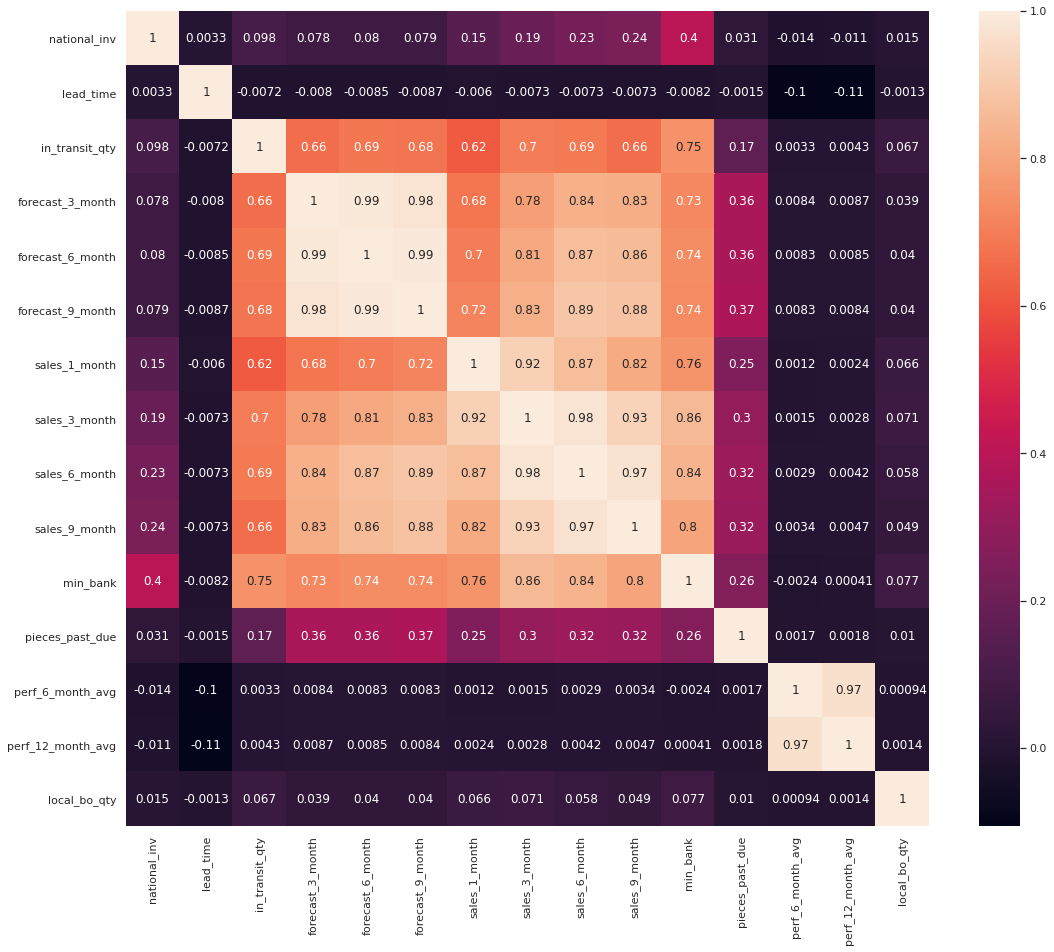

In [ ]:
cor = data.corr()
sns.set(rc={'figure.figsize':(18,15)})
# plot the heatmap
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,annot = True)

*   All the significant correlations observed are positive.
*   forecast_3_month , forecast_6_month and forecast_9_month are very strogly correlated with each other to a degree of 0.99
*   sales_1_month, sales_3_month, sales_6_month and sales_9_month are strongly correlated with each other with a degree varying from 0.82 to 0.98
*   forecast and sale columns are correlated with each other with a minimum degree of 0.62 varying upto 0.88. It is obvious that when the sales for a certain products is high in the past sales the forecast for the same in the coming months will be higher and viceversa.
*   perf_6_month_avg and perf_12_month_avg are very highly correlated with each other to a degree of 0.97
*   min_bank ( minimum amount of stock recommended ) is highly correlated with sales and forecast columns as stock in inventory is directly proportional to sales.
*   in_transit_qty is highly correlated with sales, forecast and min_bank columns. This is obvious because high sales of a product => more of that product in transport for inventory replenishing
high sales of a product => high forecast 
*   pieces_past_due is meekly correlated with sales and forecast columns
*   national_inv is meekly correlated with min_bank and weekly correlated with sale columns.
*   As many features are correlated the linear models like logistic regression, Linear SVM and other linear models may not perform well as the coeffiecients of separating plane change
*   By checking VIF value between the correlated features we can remove redundant features if needed or using PCA we can reduce dimensions if feature importance of model is not important


Important conclusions from EDA:



1.   Dataset is highly imbalanced should be handled.
2.   Almost all numerical features have outliers and are in range <0th quantile valuue and >90th quantile value
3.  The sales , performance and forecast columns have distributions sames as others beloging to same group and are also highly correlated , so for appplying linear models only one from each group can be selected.( selecting all also won't deteroriate model performance)
4.  As seen from barplots except stop_auto_buy and deck_risk remaining categorical features are useful for classification.
5.  Missing values in lead_time and incorrect value(-99.0) in two performance feature columns should be handled.



<h3> 2.9 Preprocessing data <h3>

 Label encoding categorical variables

In [ ]:
cat = data.select_dtypes(include = ['object']).columns
for col in cat:
    data[col].replace({'No': 0, 'Yes': 1}, inplace=True)
    data[col] = data[col].astype(int)

Replacing -99.0 in performance columns with nan for imputing

In [ ]:
data.perf_12_month_avg.replace({-99.0 : np.nan}, inplace = True)
data.perf_6_month_avg.replace({-99.0 : np.nan}, inplace = True)

In [ ]:
#Lst of columns having right skewed data
skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']


<h1>3. Feature Engineering</h1>

<h2> 3.1 Train and test split <h2>

In [ ]:

data_y = data['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(data.drop(['went_on_backorder'], axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

In [ ]:
"""
data_y = data['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(data.drop(['went_on_backorder'], axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.20)
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.25)
"""

<h2> 3.2 Selecting the column indices which are right skewed<h2>

In [ ]:
log_columns = []
for i in skewed_right:
  log_columns.append(X_train.columns.get_loc(i))

<h2> 3.3 Imputing missing values using a model IterativeImputer <h2>

In [ ]:

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)
X_cv = imp.transform(X_cv)


In [ ]:
# Copying data to try and apply log transform 
X_train_log, X_cv_log,X_test_log, y_train_log, y_cv_log , y_test_log = X_train, X_cv,X_test, y_train, y_cv , y_test

<h2> 3.4 Applying Robust scaler for scaling data <h2>

In [ ]:
transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_cv = transformer.transform(X_cv)
X_test = transformer.transform(X_test)

<h2> 3.5 Applying Log transform for Right skewed columns <h2>

In [ ]:
def log_transform(a):
  sign = np.sign(a[log_columns])
  a[log_columns] =  np.log(1.0+abs(a[log_columns]))*sign

  return a


In [87]:
log_columns

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]

In [ ]:
X_train_log = np.apply_along_axis(log_transform, 1, X_train_log)
X_cv_log = np.apply_along_axis(log_transform, 1, X_cv_log)
X_test_log = np.apply_along_axis(log_transform, 1, X_test_log)

<h2> 3.6 Applying standard scaler to log transformed data <h2>

In [ ]:
sc = StandardScaler().fit(X_train_log)
X_train_log = sc.transform(X_train_log)
X_cv_log = sc.transform(X_cv_log)
X_test_log = sc.transform(X_test_log)

<h2> Key takeaways after EDA & Feature Engieering


1.   The problem we are solving is binary classification with very high data imbalance with positive class being the minority.
2.   Data consists of both Categorical features and numerical features.
3.   The categorical features consists of different flags with Yes or No values.
4.   Missing values are present in Lead time column and -99.0 an unusual value in performance columns in which the remaining values are b/w 0 and 1
5.   Almost all the numerical columns had extreme skewedness (on positive side) indicating them as outliers or also can be useful data as sale , inventory , forecast of some products might be very high.
6.   As part of preprocesing and feature engineering data , dropped the first columns (Sku) which contains product ids unique for each row and also dropped the last row whch contains nan values.
7.   One hot encoded target variable and dependent variable with No as 0 and Yes as 1
8.   Replaced -99.0 in performance columns with Nan for imputation.
9.   Divided the data into train, test and CV(cross validation) sets.
10.  Fitted iterativeimputer on train data imputed nan values in train , test and CV sets.
11.  Fitted the Robust scaler on train data and tranformed train, test and cv sets. As Robusts scaler considers IQR for scaling the data the effect of right skewed values while scaling is mitigated.
12.  Applied the log transform to the data obtained in step 10 followed by standardization to prepare another dataset .



<h1> 4. Machine learning models <h1>

<h2> 4.1 On Robust scaled dataset <h2>

<h3> 4.1.1 Balanced Bagging classifier <h3>

In [ ]:
model = BalancedBaggingClassifier(n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 500}
Best Score :  0.9659618088218467


In [77]:
model = BalancedBaggingClassifier(n_estimators = gs.best_params_['n_estimators'],n_jobs=-1)
model.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
                          bootstrap_features=False, max_features=1.0,
                          max_samples=1.0, n_estimators=500, n_jobs=-1,
                          oob_score=False, random_state=None, ratio=None,
                          replacement=False, sampling_strategy='auto',
                          verbose=0, warm_start=False)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.9144397726611639
The Macro F1-Score obtained on CV set is :  0.542653513669145
The F1 scores of each class on CV set are :  [0.95666303 0.128644  ]


In [89]:
def evaluate_model(model,X,y_true):

  """
  This function takes trained model , X(input) , y_true(true label) as input and 
  evaluates model on different metrics
  """
  th = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
  pred = model.predict_proba(X)[:,1]
  scores = []
  tpr = []
  fpr = []

  for i in th:
    pred_labels =[]
    for j in pred:
      if j>=i:
        pred_labels.append(1)
      else:
        pred_labels.append(0)
    scores.append([recall_score(y_true,pred_labels,pos_label=1),precision_score(y_true,pred_labels,pos_label=1)])

    pred_labels = np.array(pred_labels)

    fp = np.sum((pred_labels == 1) & (y_true == 0))
    tp = np.sum((pred_labels == 1) & (y_true == 1))
    fn = np.sum((pred_labels == 0) & (y_true == 1))
    tn = np.sum((pred_labels == 0) & (y_true == 0))
    
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))
  f1score = f1_score(y_true, model.predict(X),average = None)
  print("The F1 scores of each class and Macro F1 score are : " , f1score[0] ,f1score[1] , (f1score[0]+f1score[1])/2)

  xx = [X[0] for X in scores]
  yy = [Y[1] for Y in scores]
  fig = plt.figure(figsize=(6,8))

  ax1 = fig.add_subplot(311)
  ax1.plot(xx,yy,label = 'AUC PR curve'+str(np.round(auc(xx,yy),3)))

  ax1.set_title("Precision - Recall curve")
  ax1.set_xlabel("Recall")
  ax1.set_ylabel("Precision")
  ax1.legend()

  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)

  ax2 = fig.add_subplot(312)
  ax2.plot(fpr,tpr,label = "Model ROC AUC on test data : "+str(np.round(auc(fpr,tpr),3)))
  ax2.plot([0, 1], ls="--",label='No Skill')
  ax2.set_title("ROC-AUC curve")
  ax2.set_xlabel("FPR")
  ax2.set_ylabel("TPR")
  ax2.legend()
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)


The F1 scores of each class and Macro F1 score are :  0.956746713518304 0.13008536852309327 0.5434160410206986


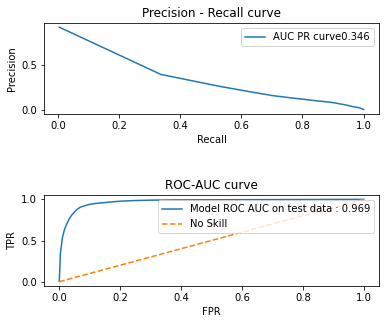

In [ ]:

evaluate_model(model,X_test,y_test)

<h3> 4.1.2 Random Forest with Balanced sub-sample<h3>

In [ ]:
model = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000] , 'max_depth' : [1,3,5,7]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'max_depth': 7, 'n_estimators': 500}
Best Score :  0.9376563808351219


In [ ]:
model = RandomForestClassifier(n_estimators = gs.best_params_['n_estimators'],max_depth =gs.best_params_['max_depth'],class_weight = "balanced_subsample", n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.8547577426287102
The Macro F1-Score obtained on CV set is :  0.49860854186376186
The F1 scores of each class on CV set are :  [0.92302509 0.07419199]


The F1 scores of each class and Macro F1 score are :  0.9221989569149346 0.07491981060027493 0.4985593837576048


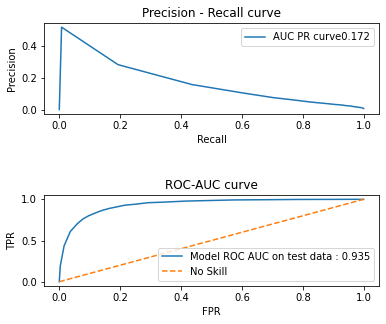

In [ ]:
evaluate_model(model,X_test,y_test)

<h3> 4.1.3 XGBoost <h3>

In [ ]:
model = XGBClassifier(nthread=-1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.9525003524781323


In [ ]:
model = XGBClassifier(n_estimators = gs.best_params_['n_estimators'],nthread=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.5270311313196535
The Macro F1-Score obtained on CV set is :  0.5484140068285212
The F1 scores of each class on CV set are :  [0.99672587 0.10010215]


The F1 scores of each class and Macro F1 score are :  0.996747309989683 0.11417004048582995 0.5554586752377565


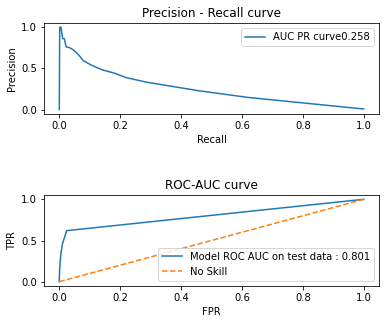

In [ ]:
evaluate_model(model,X_test,y_test)

<h3> 4.1.4 Easy Ensemble <h3>

In [ ]:
model = EasyEnsembleClassifier( n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000] }
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 300}
Best Score :  0.9383457828413979


In [ ]:
model = EasyEnsembleClassifier(n_estimators = gs.best_params_['n_estimators'],n_jobs=-1)
model.fit(X_train, y_train)

EasyEnsembleClassifier(base_estimator=None, n_estimators=300, n_jobs=-1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.863521662718461
The Macro F1-Score obtained on CV set is :  0.500920759797148
The F1 scores of each class on CV set are :  [0.92488438 0.07695714]


The F1 scores of each class and Macro F1 score are :  0.9241799599917933 0.07743017631455765 0.5008050681531755


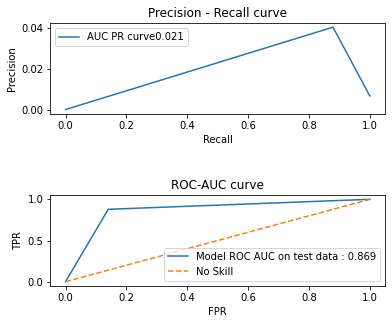

In [ ]:
evaluate_model(model,X_test,y_test)

4.1.5 SMOTETomek + Logistic regession

In [ ]:

smotemek = SMOTETomek(sampling_strategy='auto')


X_train_smt, y_train_smt = smotemek.fit_sample(X_train, y_train)
np.save('X_train_smt.npy', X_train_smt) 
np.save('y_train_smt.npy', y_train_smt) 


In [ ]:
url = 'https://drive.google.com/uc?id=1zknBZV2mWmrcZNaon-O5PgIyMcka4Yi_'
output = 'y_train_smt.npy'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zknBZV2mWmrcZNaon-O5PgIyMcka4Yi_
To: /content/y_train_smt.npy
19.3MB [00:00, 70.5MB/s]


'y_train_smt.npy'

In [ ]:
X_train_smt = np.load('X_train_smt.npy') # load
y_train_smt = np.load('y_train_smt.npy') # load

In [ ]:
model = LogisticRegression(n_jobs = -1)
parameters = {'penalty' : ['l1', 'l2'] , 'C' : [0.01,0.1,0,1.0,10.0,100.0,1000.0]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_smt, y_train_smt)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'C': 1.0, 'penalty': 'l2'}
Best Score :  0.7764901232938124


In [ ]:
model = LogisticRegression(penalty = gs.best_params_['penalty'],C = gs.best_params_['C'],n_jobs=-1)
model.fit(X_train_smt, y_train_smt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.7235180250421213
The Macro F1-Score obtained on CV set is :  0.4351532002437161
The F1 scores of each class on CV set are :  [0.83669812 0.03360828]


The F1 scores of each class and Macro F1 score are :  0.8371793584920028 0.03325181364187509 0.43521558606693894


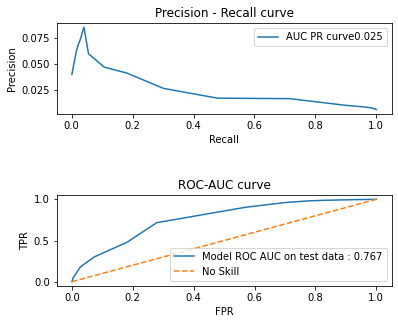

In [ ]:
evaluate_model(model,X_test,y_test)

<h3> 4.1.5 Adaboost Classifier <h3>

In [ ]:
model = AdaBoostClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.939677383414887


In [ ]:
model = AdaBoostClassifier(n_estimators = gs.best_params_['n_estimators'])
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))

The ROC-AUC Score obtained on CV set is :  0.5251165087673383
The Macro F1-Score obtained on CV set is :  0.5422918780423824
The F1 scores of each class on CV set are :  [0.99646115 0.08812261]


The F1 scores of each class and Macro F1 score are :  0.9964939305447343 0.09167950693374421 0.5440867187392393


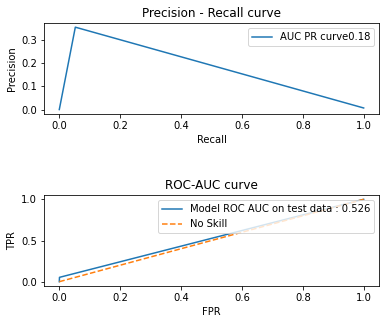

In [ ]:
evaluate_model(model,X_test,y_test)

<h3> 4.1.6 Custom ensemble <h3>

In [ ]:
data_y = data['went_on_backorder']
X_train, X_test, y_train, y_test = train_test_split(data.drop(['went_on_backorder'], axis=1), data_y , random_state = 42 , stratify=data_y,test_size=0.10)
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

In [ ]:

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X_train1)


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:
X_train1 = imp.transform(X_train1)
X_test = imp.transform(X_test)
X_train2 = imp.transform(X_train2)


In [ ]:
transformer = RobustScaler().fit(X_train1)
X_train1 = transformer.transform(X_train1)
X_train2 = transformer.transform(X_train2)
X_test = transformer.transform(X_test)

In [ ]:

DT = DecisionTreeClassifier()
meta_model = XGBClassifier(n_estimators = 300,nthread=-1)

In [ ]:

class custom_ensemble:

  def __init__(self,base_model,meta_model,number_of_splits,bootstrap_size):
    """
    Init method for initializing the instance attributes
    """

    self.base_model = base_model
    self.meta_model = meta_model
    self.number_of_splits = number_of_splits
    self.bootstrap_size = bootstrap_size
  
  def split_dataset(self,X,y):
    """
    Method for creation of boostrap samples
    """
    X_samples = []
    y_samples = []

    
    for i in range(self.number_of_splits):  ##https://stackoverflow.com/questions/23455728/scikit-learn-balanced-subsampling
      subsample = []
      lst = [0,1]
      for j in lst:
        samples = np.where(y.values==j)[0]
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=self.bootstrap_size, replace=True)
        subsample.extend(samples[indexes])
      X_samples.append(X[subsample])
      y_samples.append(y.values[subsample])
    
    return X_samples , y_samples

  def base_models_fit(self,X_samples,y_samples):

    """
    Method fitting base models on bootstrap samples
    """

    weak_learners = []
    for i in tqdm(range(len(X_samples))):
      
      X_samples[i], y_samples[i] = shuffle(X_samples[i], y_samples[i], random_state=0)
      weak_learners.append(self.base_model.fit(X_samples[i],y_samples[i]))
    
    return weak_learners

  def create_meta_dataset(self,weak_learners , X_train2 , y_train2):

    """
    Method for creation of dataset for meta classifier 
    """

    meta_x = []
    meta_y = []

    for i in tqdm(range(X_train2.shape[0])):
      for j in range(len(weak_learners)):
        pred = weak_learners[j].predict(X_train2[i].reshape(1,-1))
        meta_x.append(pred)
        meta_y.append(np.array(y_train2.values[i]))
    return meta_x,meta_y
  
  def meta_model_fit(self,meta_x,meta_y):

    """
    Metho for fitting meta model
    """
     
    model = self.meta_model.fit(meta_x, meta_y)
    print("ROC-AUC score after fitting meta model : " , roc_auc_score(meta_y, model.predict_proba(meta_x)[:, 1]))
    return model


    



In [ ]:
custom_model = custom_ensemble(DT,meta_model,100,10000)
D1_X,D1_y = custom_model.split_dataset(X_train1,y_train1)
base_learners = custom_model.base_models_fit(D1_X,D1_y)



In [ ]:
D2_X,D2_y = custom_model.create_meta_dataset(base_learners,X_train2,y_train2)

In [ ]:
meta_model_final = custom_model.meta_model_fit(np.array(D2_X).reshape(-1,1) , np.array(D2_y).reshape(-1,1))

[05:24:35] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
ROC-AUC score after fitting meta model :  0.8605223274883366


In [ ]:
D2_X,D2_y = [] , [] #freeing memory

In [ ]:
test_X,test_y = custom_model.create_meta_dataset(base_learners,X_test,y_test)

The F1 scores of each class and Macro F1 score are :  0.9966443052760794 0.0 0.4983221526380397


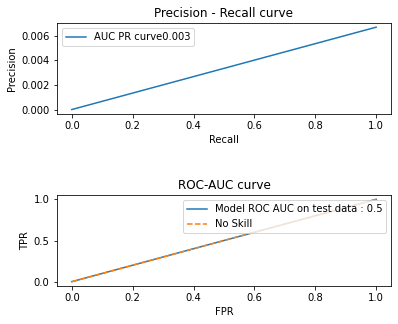

In [ ]:
evaluate_model(meta_model_final,np.array(test_X).reshape(-1,1) , np.array(test_y).reshape(-1,1))

<h2> 4.2 On Log tranformed + Normalized dataset <h2>

<h3> 4.2.1 Balanced Bagging classifier <h3>

In [ ]:
model = BalancedBaggingClassifier(n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.966020657141776


In [83]:
model = BalancedBaggingClassifier(n_estimators = gs.best_params_['n_estimators'],n_jobs=-1)
model.fit(X_train_log, y_train)

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
                          bootstrap_features=False, max_features=1.0,
                          max_samples=1.0, n_estimators=1000, n_jobs=-1,
                          oob_score=False, random_state=None, ratio=None,
                          replacement=False, sampling_strategy='auto',
                          verbose=0, warm_start=False)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.9150083938692116
The Macro F1-Score obtained on CV set is :  0.5427567426713987
The F1 scores of each class on CV set are :  [0.95668297 0.12883052]


The F1 scores of each class and Macro F1 score are :  0.956924023989479 0.13031197037223022 0.5436179971808546


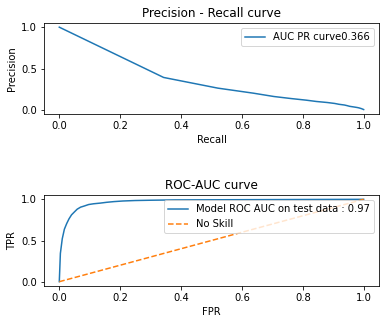

In [ ]:
evaluate_model(model,X_test_log,y_test)

<h3> 4.2.2 Random Forest with Balanced sub-sample<h3>

In [ ]:
model = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000] , 'max_depth' : [1,3,5,7]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'max_depth': 7, 'n_estimators': 1000}
Best Score :  0.937589329175456


In [ ]:
model = RandomForestClassifier(n_estimators = gs.best_params_['n_estimators'],max_depth =gs.best_params_['max_depth'],class_weight = "balanced_subsample", n_jobs=-1)
model.fit(X_train_log, y_train)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.853370735066409
The Macro F1-Score obtained on CV set is :  0.4982164957616094
The F1 scores of each class on CV set are :  [0.92269363 0.07373936]


The F1 scores of each class and Macro F1 score are :  0.9217465896458887 0.07437105723189177 0.49805882343889024


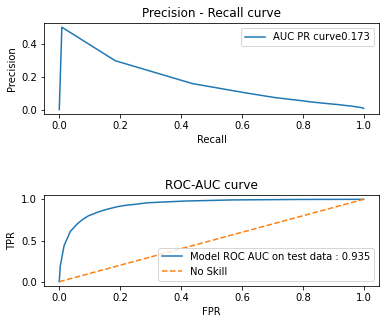

In [ ]:
evaluate_model(model,X_test_log,y_test)

<h3> 4.2.3 XGBoost <h3>

In [ ]:
model = XGBClassifier(nthread=-1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.952499535792556


In [ ]:
model = XGBClassifier(n_estimators = gs.best_params_['n_estimators'],nthread=-1)
model.fit(X_train_log, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.5286885330497567
The Macro F1-Score obtained on CV set is :  0.5512659142994788
The F1 scores of each class on CV set are :  [0.99673325 0.10579858]


The F1 scores of each class and Macro F1 score are :  0.9967384388509315 0.10813008130081302 0.5524342600758723


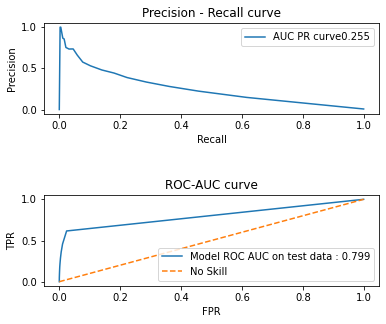

In [ ]:
evaluate_model(model,X_test_log,y_test)

<h3> 4.2.4 Easy Ensemble <h3>

In [ ]:
model = EasyEnsembleClassifier( n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000] }
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 500}
Best Score :  0.9383464694023459


In [ ]:
model = EasyEnsembleClassifier(n_estimators = gs.best_params_['n_estimators'] ,n_jobs=-1)
model.fit(X_train_log, y_train)

EasyEnsembleClassifier(base_estimator=None, n_estimators=500, n_jobs=-1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.8634806565004274
The Macro F1-Score obtained on CV set is :  0.5008762655185055
The F1 scores of each class on CV set are :  [0.92483702 0.07691551]


The F1 scores of each class and Macro F1 score are :  0.924156060654634 0.0773730598237267 0.5007645602391804


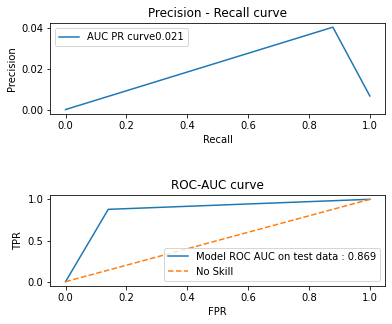

In [ ]:
evaluate_model(model,X_test_log,y_test)

<h3> 4.2.5 AdaBoost </h3>

In [ ]:
model = AdaBoostClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = GridSearchCV(model, parameters,scoring = 'roc_auc' )
gs = clf.fit(X_train_log, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.9396774190556402


In [ ]:
model = AdaBoostClassifier(n_estimators = gs.best_params_['n_estimators'])
model.fit(X_train_log, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=None)

In [ ]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))

The ROC-AUC Score obtained on CV set is :  0.5245739824253121
The Macro F1-Score obtained on CV set is :  0.5415035496623903
The F1 scores of each class on CV set are :  [0.99646864 0.08653846]


The F1 scores of each class and Macro F1 score are :  0.9964999197092882 0.09041731066460588 0.543458615186947


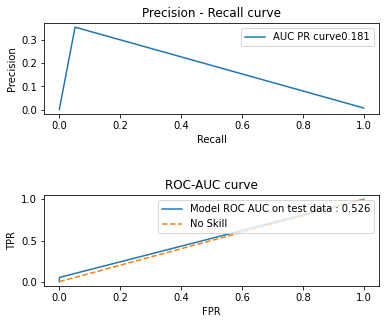

In [ ]:
evaluate_model(model,X_test_log,y_test)

<h1> 5. Comparision of performance of different models <h1>

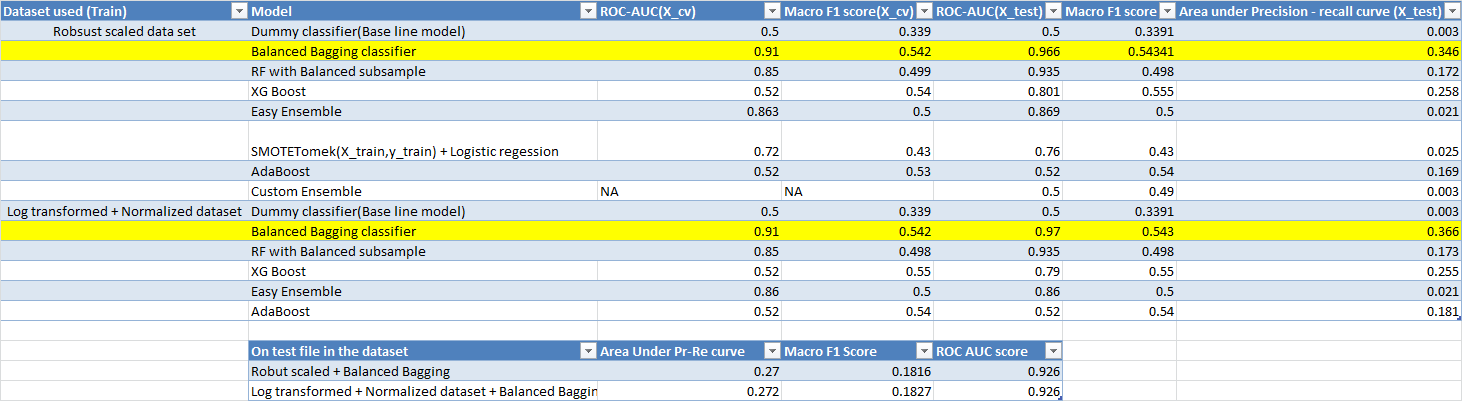



*   The best model is Balanced Bagging classifier applied on Log transformed and normalized dataset with test ROC-AUC score of 0.97 and Area under precision-Recall curve of 0.366(ROC-AUC 0.926 and Pr-Re AUC 0.272 on test file in dataset) which are very close to the metrics obtained in publication https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning
*   Area under precision recall curve is an important metric as the Managerial decision for threshold selection is based on precision and recall values.
*   The F1-Scores obtained above are with threshold of 0.5 which is default in sklearn

